In [1]:
import pandas as pd

df_2501 = pd.read_csv('./data/Official/df_2501.csv') # 2501
df_assay = pd.read_csv('./data/Official/data_remove_dup.csv') # assay
df_reference = pd.read_csv('./data/Official/data_standardize.csv') # reference
df_23012024 = pd.read_csv('./data/Official/data_23012024.csv') # 23012024
df_collect_2501 = pd.read_csv("./data/Official/data_collect_2501.csv") # collect 2501

In [9]:
df_assay["Assay_id"].unique()

array([    nan, 487607., 560236., 623996., 560228., 588522., 588606.])

In [8]:
df_assay[df_assay["Target_id"] == "P43071"]

,ID,CanonicalSMILES,Title,Activity,Activity_values,Activity_unit,Target_id,Assay_id,Assay_type,Assay_description,References
12,45272104,C1CCN(C1)CC(CN2C3=CC=CC=C3C(=O)C4=C2C(=CC=C4)C...,NaN,Active,NaN,NaN,P43071,487607.0,Literature-derived,Modulation of CDR1-mediated rhodamine 6G accum...,National Center for Biotechnology Information ...
13,5281767,COC1=C(C=CC(=C1)C=CC(=CC(=O)C=CC2=CC(=C(C=C2)O...,NaN,Active,NaN,NaN,P43071,560236.0,Literature-derived,Inhibition of GFP-tagged Candida albicans CDR1...,National Center for Biotechnology Information ...
14,44202257,CN(C)CCOC1=CC=C(C=C1)C2=C(SC3=C2C=C(C=C3)OC)C4...,NaN,Active,26.78,EC50,P43071,623996.0,Confirmatory,Dose Response HTS singleplex for inhibitors of...,National Center for Biotechnology Information ...
15,44601948,CN(C)CCOC1=CC=C(C=C1)C2=C(SC3=C2C=C(C=C3)OC)C4...,NaN,Active,20.13,EC50,P43071,623996.0,Confirmatory,Dose Response HTS singleplex for inhibitors of...,National Center for Biotechnology Information ...
16,44202057,CC1CN(C(=O)C2=C(C(=CC=C2)NC(=O)NC3CCCCC3)OC1CN...,NaN,Active,10.43,EC50,P43071,623996.0,Confirmatory,Dose Response HTS singleplex for inhibitors of...,National Center for Biotechnology Information ...
...,...,...,...,...,...,...,...,...,...,...,...
109,16746082,C1CN(CCC12C3(CC(=NO3)C4=CC=CC=C4)C(=O)C5=C(O2)...,NaN,Inactive,NaN,EC50,P43071,623996.0,Confirmatory,Dose Response HTS singleplex for inhibitors of...,National Center for Biotechnology Information ...
110,20912392,COC1=CC=C(C=C1)N2CCN(CC2)C(=O)C3CCCN(C3)C4=NC=...,NaN,Inactive,NaN,EC50,P43071,623996.0,Confirmatory,Dose Response HTS singleplex for inhibitors of...,National Center for Biotechnology Information ...
111,14704104,COC1=CC=C(C=C1)C(=O)OCCC2=CC=C(C=C2)O,NaN,Inactive,NaN,EC50,P43071,623996.0,Confirmatory,Dose Response HTS singleplex for inhibitors of...,National Center for Biotechnology Information ...
112,5315472,C1=CC(=CC=C1C=CC(=O)CC(=O)C=CC2=CC=C(C=C2)O)O,NaN,Inactive,40.00,IC50,P43071,560228.0,Confirmatory,Inhibition of GFP-tagged Candida albicans CDR1...,National Center for Biotechnology Information ...


In [85]:
df_assay[df_assay["Activity_values"].notnull()].shape

(27, 11)

In [87]:
df_assay[df_assay["ID"] == 44601951]

,ID,CanonicalSMILES,Title,Activity,Activity_values,Activity_unit,Target_id,Assay_id,Assay_type,Assay_description,References
1579,44601951,COC1=CC=CC=C1C2=C(C3=CC(=C(C=C3S2)OC)OC)C4=CC=...,NaN,Inactive,NaN,NaN,ABE98658,588522.0,Screening,Flow Cytometric HTS singleplex for inhibitors ...,National Center for Biotechnology Information ...


In [80]:
df_filtered = df_collect_2501[df_collect_2501['Value'].notnull()]
df_filtered.shape


(25, 7)

In [58]:
df_new = pd.concat([df_23012024,df_collect_2501[["ID","SMILES","Title","Activity","Reference"]]],axis=0)
df_new.drop_duplicates(subset=['ID'],inplace=True)
df_new

,ID,SMILES,Title,Activity,Reference
0,Isonitrile_1,[C-]#[N+]C1=CC(=CCC(=O)O)CC1,Isonitrile_derrivatives,Active,https://doi.org/10.1016/j.bbrc.2005.03.009
1,Isonitrile_2,[C-]#[N+]C1=CC(=CCC(=O)OC)CC1,Isonitrile_derrivatives,Active,https://doi.org/10.1016/j.bbrc.2005.03.009
2,WK14,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
3,WK14B,CC(=O)Oc1ccccc1/C=C/c1ccc2cccc(OC(C)=O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
4,WK15,Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
...,...,...,...,...,...
58,flavanones,CC(C=C)(C)C1=C(O)C=C(O)C([C@@H]2CC(C3=C(O)C(C/...,prenylated_flavanones,Active,DOI: 10.2174/0929867324666170523102244
59,N_ethylmaleimid,CCN1C(=O)C=CC1=O,N_ethylmaleimid,Active,DOI: 10.2174/0929867324666170523102244
60,3117,CCN(CC)C(=S)SSC(=S)N(CC)CC,Disulfiram,Active,DOI: 10.2174/0929867324666170523102244
61,1549008,CC(C)(C)C#CC=CCN(C)CC1=CC=CC2=CC=CC=C21,terbinafine,Active,https://doi.org/10.1016/S0924-8579(03)00213-9


In [59]:
#Standardize SMILES
import sys, os
sys.path.append("./MolUtil/ultility/")
from standardize import standardization
from rdkit.rdBase import BlockLogs

block = BlockLogs()
std = standardization(data=df_new,ID='ID', smiles_col='SMILES', active_col='Activity', ro5 =0)
data = std.filter_data()
data.head()

reading NP model ...
model in


  0%|          | 0/1833 [00:00<?, ?it/s]

  0%|          | 0/1833 [00:00<?, ?it/s]

,ID,SMILES,Title,Activity,Reference,Canomicalsmiles,Molecule
0,Isonitrile_1,[C-]#[N+]C1=CC(=CCC(=O)O)CC1,Isonitrile_derrivatives,Active,https://doi.org/10.1016/j.bbrc.2005.03.009,[C-]#[N+]C1=CC(=CCC(=O)O)CC1,<rdkit.Chem.rdchem.Mol object at 0x28e93b7d0>
1,Isonitrile_2,[C-]#[N+]C1=CC(=CCC(=O)OC)CC1,Isonitrile_derrivatives,Active,https://doi.org/10.1016/j.bbrc.2005.03.009,[C-]#[N+]C1=CC(=CCC(=O)OC)CC1,<rdkit.Chem.rdchem.Mol object at 0x28e93b840>
2,WK14,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1,<rdkit.Chem.rdchem.Mol object at 0x28e93b920>
3,WK14B,CC(=O)Oc1ccccc1/C=C/c1ccc2cccc(OC(C)=O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044,CC(=O)Oc1ccccc1/C=C/c1ccc2cccc(OC(C)=O)c2n1,<rdkit.Chem.rdchem.Mol object at 0x28e93bae0>
4,WK15,Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044,Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,<rdkit.Chem.rdchem.Mol object at 0x28e93bb50>


In [88]:
df_new

,ID,SMILES,Title,Activity,Reference,Canomicalsmiles
0,Isonitrile_1,[C-]#[N+]C1=CC(=CCC(=O)O)CC1,Isonitrile_derrivatives,Active,https://doi.org/10.1016/j.bbrc.2005.03.009,[C-]#[N+]C1=CC(=CCC(=O)O)CC1
1,Isonitrile_2,[C-]#[N+]C1=CC(=CCC(=O)OC)CC1,Isonitrile_derrivatives,Active,https://doi.org/10.1016/j.bbrc.2005.03.009,[C-]#[N+]C1=CC(=CCC(=O)OC)CC1
2,WK14,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1
3,WK14B,CC(=O)Oc1ccccc1/C=C/c1ccc2cccc(OC(C)=O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044,CC(=O)Oc1ccccc1/C=C/c1ccc2cccc(OC(C)=O)c2n1
4,WK15,Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044,Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1
...,...,...,...,...,...,...
58,flavanones,CC(C=C)(C)C1=C(O)C=C(O)C([C@@H]2CC(C3=C(O)C(C/...,prenylated_flavanones,Active,DOI: 10.2174/0929867324666170523102244,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(cc(O)c(CC=C(C)...
59,N_ethylmaleimid,CCN1C(=O)C=CC1=O,N_ethylmaleimid,Active,DOI: 10.2174/0929867324666170523102244,CCN1C(=O)C=CC1=O
60,3117,CCN(CC)C(=S)SSC(=S)N(CC)CC,Disulfiram,Active,DOI: 10.2174/0929867324666170523102244,CCN(CC)C(=S)SSC(=S)N(CC)CC
61,1549008,CC(C)(C)C#CC=CCN(C)CC1=CC=CC2=CC=CC=C21,terbinafine,Active,https://doi.org/10.1016/S0924-8579(03)00213-9,CN(CC=CC#CC(C)(C)C)Cc1cccc2ccccc12


In [62]:
data = data[["ID","Canomicalsmiles","Title","Activity","Reference"]]
data.rename(columns={"Canomicalsmiles":"Canonical_smiles"},inplace=True)

/var/folders/k5/1m57zwdx4rg_gqk0zr7t2mx00000gn/T/ipykernel_1498/3288373299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"Canomicalsmiles":"Canonical_smiles"},inplace=True)


,ID,Canonical_smiles,Title,Activity,Reference
0,Isonitrile_1,[C-]#[N+]C1=CC(=CCC(=O)O)CC1,Isonitrile_derrivatives,Active,https://doi.org/10.1016/j.bbrc.2005.03.009
1,Isonitrile_2,[C-]#[N+]C1=CC(=CCC(=O)OC)CC1,Isonitrile_derrivatives,Active,https://doi.org/10.1016/j.bbrc.2005.03.009
2,WK14,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
3,WK14B,CC(=O)Oc1ccccc1/C=C/c1ccc2cccc(OC(C)=O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
4,WK15,Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
...,...,...,...,...,...
58,flavanones,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(cc(O)c(CC=C(C)...,prenylated_flavanones,Active,DOI: 10.2174/0929867324666170523102244
59,N_ethylmaleimid,CCN1C(=O)C=CC1=O,N_ethylmaleimid,Active,DOI: 10.2174/0929867324666170523102244
60,3117,CCN(CC)C(=S)SSC(=S)N(CC)CC,Disulfiram,Active,DOI: 10.2174/0929867324666170523102244
61,1549008,CN(CC=CC#CC(C)(C)C)Cc1cccc2ccccc12,terbinafine,Active,https://doi.org/10.1016/S0924-8579(03)00213-9


In [64]:
data.to_csv("./data/Official/data_standardize.csv",index=False)

In [70]:
num_ref = len(data["Reference"].unique())
print("Number of reference: ",num_ref)

Number of reference:  34


In [74]:
df_assay

,ID,CanonicalSMILES,Title,Activity,Activity_values,Activity_unit,Target_id,Assay_id,Assay_type,Assay_description,References
0,969516,COC1=C(C=CC(=C1)C=CC(=O)CC(=O)C=CC2=CC(=C(C=C2...,Curcumin,Active,NaN,NaN,NaN,NaN,NaN,NaN,"Limtrakul P, Anuchapreeda S, Buddhasukh D. Mod..."
1,445070,CC(=CCCC(=CCCC(=CCO)C)C)C,Farnesol,Active,NaN,NaN,NaN,NaN,NaN,NaN,"Sharma M, Prasad R. The quorum-sensing molecul..."
2,4932,CCCNCC(COC1=CC=CC=C1C(=O)CCC2=CC=CC=C2)O,Propafenone,Active,NaN,NaN,NaN,NaN,NaN,NaN,"Schmid D, Ecker G, Kopp S, Hitzler M, Chiba P...."
3,3672,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O,Ibuprofen,Active,NaN,NaN,NaN,NaN,NaN,NaN,"Ricardo E, Costa-de-Oliveira S, Dias AS, Guerr..."
4,4380,CN(CCCOC1=C(C=C(C=C1)Cl)Cl)CC#C,Clorgyline,Active,NaN,NaN,NaN,NaN,NaN,NaN,"Holmes AR, Keniya MV, Ivnitski-Steele I et al...."
...,...,...,...,...,...,...,...,...,...,...,...
1720,886140,CN1CCN(CC1)C(=O)C=CC2=CC=C(C=C2)[N+](=O)[O-],NaN,Inactive,NaN,NaN,ABE98658,588522.0,Screening,Flow Cytometric HTS singleplex for inhibitors ...,National Center for Biotechnology Information ...
1721,648878,CCN(CC)C1=CC2=C(C=C1)C(=C(C(=O)O2)Br)Cl,NaN,Inactive,NaN,NaN,ABE98658,588522.0,Screening,Flow Cytometric HTS singleplex for inhibitors ...,National Center for Biotechnology Information ...
1722,3576709,CC(C)CC(C(=O)OCC(=O)NC1=CC(=CC=C1)Cl)N2C(=O)C3...,NaN,Inactive,NaN,NaN,ABE98658,588522.0,Screening,Flow Cytometric HTS singleplex for inhibitors ...,National Center for Biotechnology Information ...
1723,5791891,CN(C)C(=C1C(=O)OC(=N1)C2=CC=CC=C2)CN3CCN(CC3)C=O,NaN,Inactive,NaN,NaN,ABE98658,588522.0,Screening,Flow Cytometric HTS singleplex for inhibitors ...,National Center for Biotechnology Information ...


In [76]:
df_assay["Target_id"].unique()

array([nan, 'P43071', 'ABE98658'], dtype=object)

In [73]:
df_assay["Assay_description"].unique()  

array([nan,
       'Modulation of CDR1-mediated rhodamine 6G accumulation in Candida albicans CAI4 assessed as inhibition of fungal growth at 800 ug/ml after 48 hrs by spot assay',
       'Inhibition of GFP-tagged Candida albicans CDR1 expressed in Saccharomyces cerevisiae assessed as inhibition of energy-dependent efflux of R6G at 100 uM after 35 mins',
       'Dose Response HTS singleplex for inhibitors of yeast efflux pump, specifically Cdr1 with Cherry Pick2 compound set',
       'Inhibition of GFP-tagged Candida albicans CDR1 expressed in Saccharomyces cerevisiae assessed as inhibition of R6G efflux',
       'Flow Cytometric HTS singleplex for inhibitors of yeast efflux pump, specifically Cdr1 with Cherry Pick1 compound set',
       'Dose Response HTS singleplex for inhibitors of yeast efflux pump, specifically Cdr1 with Hit compounds from Cherry Pick1'],
      dtype=object)

/Users/thechuongtrinh/anaconda3/envs/cheminformatics/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


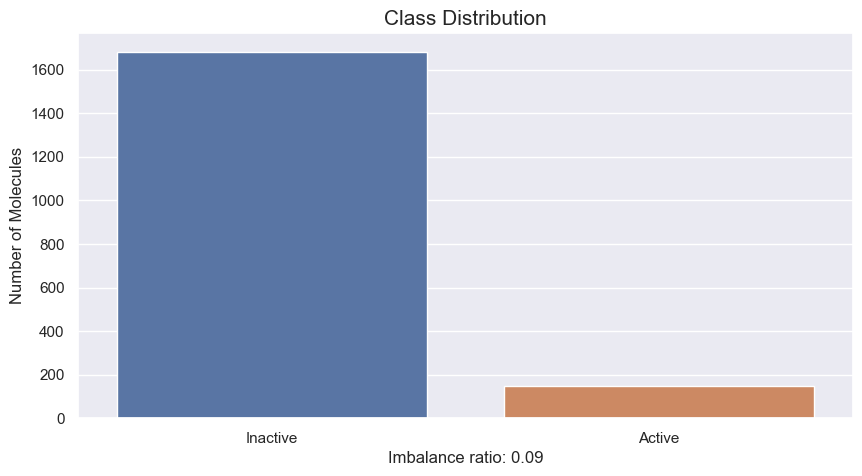

In [25]:
active_count = df_2501["Activity"].value_counts()
active_count.index = ["Inactive", "Active"] 

import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set('notebook')
sns.barplot(active_count.index, active_count.values, alpha=1)
plt.ylabel('Number of Molecules', fontsize=12)
plt.xlabel(f'Imbalance ratio: {active_count[1]/active_count[0]:.2f}')
plt.title('Class Distribution', fontsize=15)
plt.savefig('./Cluster_images/Class_Distribution.png', dpi = 600)
plt.show()


In [34]:
df_reference["Reference"].value_counts()

National Center for Biotechnology Information (2024). PubChem Bioassay Record for AID 588522, Source: NMMLSC. Retrieved January 18, 2024 from https://pubchem.ncbi.nlm.nih.gov/bioassay/588522.    1592
National Center for Biotechnology Information (2024). PubChem Bioassay Record for AID 623996, Source: NMMLSC. Retrieved January 18, 2024 from https://pubchem.ncbi.nlm.nih.gov/bioassay/623996.      98
https://doi.org/10.1039/C9RA09348F                                                                                                                                                                   23
National Center for Biotechnology Information (2024). PubChem Bioassay Record for AID 588606, Source: NMMLSC. Retrieved January 18, 2024 from https://pubchem.ncbi.nlm.nih.gov/bioassay/588606.      18
https://doi.org/10.1128/aac.00956-08                                                                                                                                                                  6


In [36]:
df_assay["References"].value_counts()  

National Center for Biotechnology Information (2024). PubChem Bioassay Record for AID 588522, Source: NMMLSC. Retrieved January 18, 2024 from https://pubchem.ncbi.nlm.nih.gov/bioassay/588522.                                                                                                                                              1593
National Center for Biotechnology Information (2024). PubChem Bioassay Record for AID 623996, Source: NMMLSC. Retrieved January 18, 2024 from https://pubchem.ncbi.nlm.nih.gov/bioassay/623996.                                                                                                                                                98
National Center for Biotechnology Information (2024). PubChem Bioassay Record for AID 588606, Source: NMMLSC. Retrieved January 18, 2024 from https://pubchem.ncbi.nlm.nih.gov/bioassay/588606.                                                                                                                                     

In [13]:
df_reference[df_reference["ID"]== "5281767"]

,ID,Canonical_smiles,Title,Activity,Reference
59,5281767,COc1cc(C=CC(=O)C=C(O)C=Cc2ccc(O)c(OC)c2)ccc1O,NaN,Active,National Center for Biotechnology Information ...


In [17]:
df_reference[df_reference["Activity"]== "Active"]["Reference"].value_counts()

https://doi.org/10.1039/C9RA09348F                                                                                                                                                                                                                                                                                                           23
US00000011174267B220211116                                                                                                                                                                                                                                                                                                                   18
National Center for Biotechnology Information (2024). PubChem Bioassay Record for AID 588606, Source: NMMLSC. Retrieved January 18, 2024 from https://pubchem.ncbi.nlm.nih.gov/bioassay/588606.                                                                                                                                         

In [96]:
df_reference[df_reference["Reference"]=="https://doi.org/10.4155/fmc-2018-0081"]

,ID,Canonical_smiles,Title,Activity,Reference
8,Azole_4,COc1cc(/C=C/C(=O)c2cn(C)c3ccccc23)cc(OC)c1OC,Azoles,Active,https://doi.org/10.4155/fmc-2018-0081
9,Azole_10,COc1ccc(C(=O)/C=C/c2cccc(OC)c2OC)c(O)c1,Azoles,Active,https://doi.org/10.4155/fmc-2018-0081
10,Azole_12,COc1ccc(C(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)c(O)c1,Azoles,Active,https://doi.org/10.4155/fmc-2018-0081
11,Azole_18,COc1cc(O)c(C(=O)/C=C/C2=C[C@@H]3OCO[C@H]3C=C2)...,Azoles,Active,https://doi.org/10.4155/fmc-2018-0081


In [87]:
df_reference[df_reference["ID"]=="969516"]["Canonical_smiles"].values

array(['COc1cc(C=CC(=O)CC(=O)C=Cc2ccc(O)c(OC)c2)ccc1O'], dtype=object)

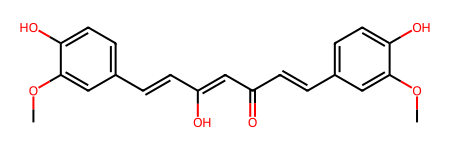

In [86]:
Chem.MolFromSmiles("COc1cc(C=CC(=O)C=C(O)C=Cc2ccc(O)c(OC)c2)ccc1O")

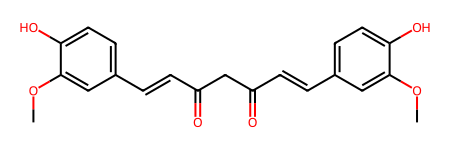

In [88]:
Chem.MolFromSmiles("COc1cc(C=CC(=O)CC(=O)C=Cc2ccc(O)c(OC)c2)ccc1O")

In [32]:
df_reference[df_reference["Reference"]=="https://doi.org/10.1128/aac.01231-16"].to_csv("./data/data_active/organotell.csv",index=False)

In [50]:
references_not_in_active = df_reference[~df_reference["Reference"].isin(df_reference[df_reference["Activity"]== "Active"]["Reference"])]
references_not_in_active

,ID,Canonical_smiles,Title,Activity,Reference
158,5315472,O=C(C=Cc1ccc(O)cc1)CC(=O)C=Cc1ccc(O)cc1,NaN,Inactive,National Center for Biotechnology Information ...
159,5324476,COc1cc(C=CC(O)=CC(=O)C=Cc2ccc(O)cc2)ccc1O,NaN,Inactive,National Center for Biotechnology Information ...


In [106]:
df_reference[df_reference["ID"]=="AMG_148"]

,ID,Canonical_smiles,Title,Activity,Reference
38,AMG_148,COc1cc(/C=C/C(=O)c2c(OC)ccc3oc(=O)sc23)ccc1OCC...,AMG_148,Active,https://doi.org/10.1111/j.1439-0507.2010.01936.x


In [71]:
df_reference[df_reference["Title"]=="milbemycins"]

,ID,Canonical_smiles,Title,Activity,Reference
53,9828343,CC1=CCC2CC(CC3(CCC(C)C(C)O3)O2)OC(=O)C2C=C(C)C...,milbemycins,Active,"Silva LV, Sanguinetti M, Vandeputte P, Torelli..."
1807,mil_a9,C/C1=C\C[C@@H]2C[C@@H](C[C@]3(CC[C@H](C)[C@@H]...,milbemycins,Active,DOI: 10.2174/0929867324666170523102244
1808,mil_a11,CC(C)=CC(=O)OCC1=C[C@H]2C(=O)O[C@H]3C[C@@H](C/...,milbemycins,Active,DOI: 10.2174/0929867324666170523102244
1809,mil_b9,CO[C@@H]1C(C)=C[C@H]2C(=O)O[C@H]3C[C@@H](C/C=C...,milbemycins,Active,DOI: 10.2174/0929867324666170523102244
1832,9959038,CCC1OC2(CCC1C)CC1CC(CC=C(C)CC(C)C=CC=C3COC4C(O...,milbemycins,Active,https://doi.org/10.1111/1567-1364.12164


In [102]:
df_reference.loc[df_reference['ID'] == 'WK15', 'Activity'] = 'Inactive'
df_reference.loc[df_reference['ID'] == 'WK15B', 'Activity'] = 'Inactive'

In [122]:
df_reference[df_reference["ID"]=="4380"]

,ID,Canonical_smiles,Title,Activity,Reference
50,4380,C#CCN(C)CCCOc1ccc(Cl)cc1Cl,Clorgyline,Active,"Holmes AR, Keniya MV, Ivnitski-Steele I et al...."


In [117]:
ID_exclude = ['spiroindolinone_6',"11620953",
              "11664338","Isonitrile_2","M19","M25","1549008", "5281767","4380","CWHM_974","AMG_148","Azole_4","Azole_10"]
df_reference_new = df_reference[~df_reference['ID'].isin(ID_exclude)]
df_reference_new

,ID,Canonical_smiles,Title,Activity,Reference
0,Isonitrile_1,[C-]#[N+]C1=CC(=CCC(=O)O)CC1,Isonitrile_derrivatives,Active,https://doi.org/10.1016/j.bbrc.2005.03.009
2,WK14,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
3,WK14B,CC(=O)Oc1ccccc1/C=C/c1ccc2cccc(OC(C)=O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
4,WK15,Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,Inactive,https://doi.org/10.1016/j.ijantimicag.2017.01.044
5,WK15B,CC(=O)Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,Inactive,https://doi.org/10.1016/j.ijantimicag.2017.01.044
...,...,...,...,...,...
1827,72300,C=CCc1ccc(O)c(-c2cc(CC=C)ccc2O)c1,magnolol,Active,DOI: 10.2174/0929867324666170523102244
1828,flavanones,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(cc(O)c(CC=C(C)...,prenylated_flavanones,Active,DOI: 10.2174/0929867324666170523102244
1829,N_ethylmaleimid,CCN1C(=O)C=CC1=O,N_ethylmaleimid,Active,DOI: 10.2174/0929867324666170523102244
1830,3117,CCN(CC)C(=S)SSC(=S)N(CC)CC,Disulfiram,Active,DOI: 10.2174/0929867324666170523102244


/Users/thechuongtrinh/anaconda3/envs/cheminformatics/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


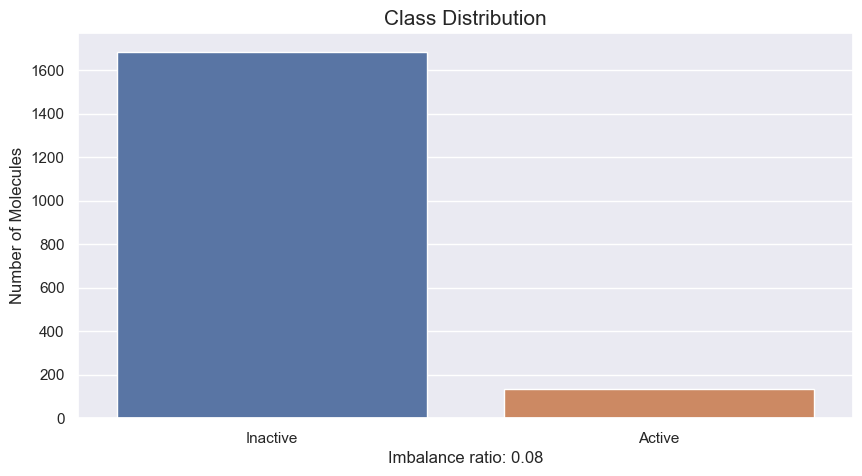

In [118]:
active_count = df_reference_new["Activity"].value_counts()
active_count.index = ["Inactive", "Active"] 

import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set('notebook')
sns.barplot(active_count.index, active_count.values, alpha=1)
plt.ylabel('Number of Molecules', fontsize=12)
plt.xlabel(f'Imbalance ratio: {active_count[1]/active_count[0]:.2f}')
plt.title('Class Distribution', fontsize=15)
#plt.savefig('./Cluster_images/Class_Distribution.png', dpi = 600)
plt.show()


In [119]:
active_count

Inactive    1685
Active       135
Name: Activity, dtype: int64

In [123]:
df_reference_new

,ID,Canonical_smiles,Title,Activity,Reference
0,Isonitrile_1,[C-]#[N+]C1=CC(=CCC(=O)O)CC1,Isonitrile_derrivatives,Active,https://doi.org/10.1016/j.bbrc.2005.03.009
2,WK14,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
3,WK14B,CC(=O)Oc1ccccc1/C=C/c1ccc2cccc(OC(C)=O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
4,WK15,Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,Inactive,https://doi.org/10.1016/j.ijantimicag.2017.01.044
5,WK15B,CC(=O)Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,Inactive,https://doi.org/10.1016/j.ijantimicag.2017.01.044
...,...,...,...,...,...
1827,72300,C=CCc1ccc(O)c(-c2cc(CC=C)ccc2O)c1,magnolol,Active,DOI: 10.2174/0929867324666170523102244
1828,flavanones,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(cc(O)c(CC=C(C)...,prenylated_flavanones,Active,DOI: 10.2174/0929867324666170523102244
1829,N_ethylmaleimid,CCN1C(=O)C=CC1=O,N_ethylmaleimid,Active,DOI: 10.2174/0929867324666170523102244
1830,3117,CCN(CC)C(=S)SSC(=S)N(CC)CC,Disulfiram,Active,DOI: 10.2174/0929867324666170523102244


In [124]:
df_reference_new.to_csv("./data/Official/data_standardize_0902.csv",index=False)